task1

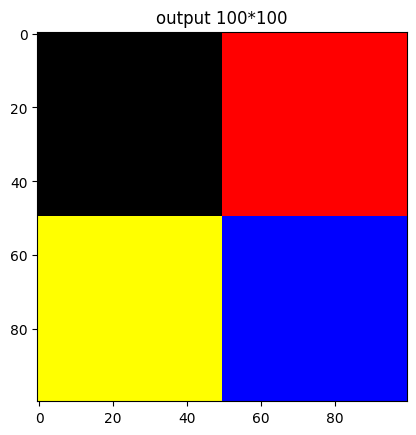

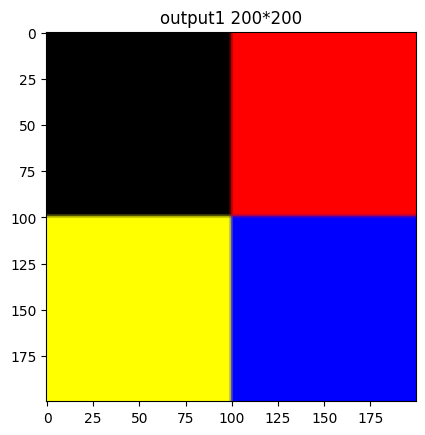

In [6]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt
 
#create 4 image with different colors   
img1 = np.zeros((50,50,3),dtype=np.uint8)
img2 = np.zeros((50,50,3),dtype=np.uint8)
img2[:] = (255,0,0)
img3 = np.zeros((50,50,3),dtype=np.uint8)
img3[:] = (255,255,0)
img4 = np.zeros((50,50,3),dtype=np.uint8)
img4[:] = (0,0,255)



hor1 = np.hstack((img1,img2))
hor2 = np.hstack((img3,img4))
ver =  np.vstack((hor1,hor2))
#resize the final image to 100*100
final = cv2.resize(ver,(100,100))
#resize the final image to 200*200
final1 = cv2.resize(ver,(200,200))   
plt.imshow(final)
plt.title("output 100*100")
plt.show()
plt.title("output1 200*200")
plt.imshow(final1)
plt.show()  


task2

In [7]:
import numpy as np
import cv2  

flag='z' 
# This will return video from the first webcam on your computer.
vid = cv2.VideoCapture(0)  
if (vid.isOpened() == False): 
    print("Error reading video file")
  
# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('pic/output.avi', fourcc, 20.0, (640, 480))
i=0
while(True):
    # reads frames from a camera 
    # ret checks return at each frame
    ret, frame = vid.read()
    key = cv2.waitKey(1)
    #rotate video to 90    
    rotate = cv2.rotate(frame,cv2.ROTATE_90_COUNTERCLOCKWISE)  
    # Converts to grayscale 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Converts to HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) 
   
   # output the frame
    if flag =='z':
        cv2.imshow("frame",frame)
    elif flag =='r': 
        cv2.imshow('ROTATE', rotate) 
    elif flag =='g':  
        cv2.imshow('GRAY', gray)
    elif flag =='h':  
        cv2.imshow('HSV', hsv) 
    elif flag =='s':  
        out.write(frame)
        cv2.imshow('save', frame) 
    elif flag =='c': 
        img= "pic/picout"+str(i)+".PNG"
        
        cv2.imwrite(img,frame)
        i+=1
        flag ='z' 
    elif flag =='x': 
        cv2.imshow("frame",frame)
        cv2.imshow('ROTATE', rotate)
        cv2.imshow('HSV', hsv)
        cv2.imshow('GRAY', gray)
                          

    if key == ord('q') or key  == ord('Q'):
        break
    elif key == ord('z') or key  == ord('Z'): 
        flag='z'
        cv2.destroyAllWindows() 
    elif key == ord('r') or key  == ord('R'): 
        flag='r'
        cv2.destroyAllWindows()
    elif key == ord('g') or key  == ord('G'): 
        flag='g'
        cv2.destroyAllWindows()
    elif key == ord('h') or key  == ord('H'): 
        flag='h'
        cv2.destroyAllWindows() 
    elif key == ord('c') or key  == ord('C'): 
        flag='c'
        cv2.destroyAllWindows() 
    elif key == ord('s') or key  == ord('S'): 
        flag='s'
        cv2.destroyAllWindows() 
    elif key == ord('x') or key  == ord('X'): 
        flag='x'
        cv2.destroyAllWindows()             
vid.release()
out.release() 
cv2.destroyAllWindows()   
    

task3

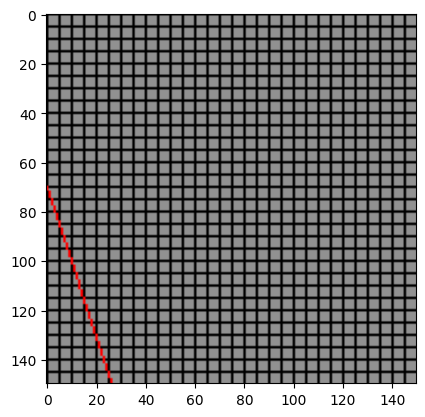

In [8]:

import cv2
import numpy as np
from matplotlib import pyplot as plt
import math as m
import math

img = np.zeros([150,150,3],np.uint8)
img.fill(145)
for i in range(0, 150, 5):
    p1 =(i,0)
    p2 =(i,150)
    cv2.line(img,p1,p2,(0,0,0),1)
for i in range(0,150,5):
    p3 = (0,i)
    p4 = (150 ,i)
    cv2.line(img,p3,p4,(0,0,0),1)
initial = (0, 70)
speed = float(input("Enter your speed : "))
angle = int(input("Enter your angle : "))
time = int(input("Enter the time : "))
height = abs((speed*18/5)*(time*60*60)*m.sin(m.radians(angle)))
width = abs((speed*18/5)*(time*60*60)*m.cos(m.radians(angle)))
cord = (initial[0] + int(width), initial[1] + int(height))
imgLine = cv2.line(img,initial,cord,(255,0,0),1)
plt.imshow(imgLine)
plt.show() 


task4

In [9]:
import cv2
import numpy as np

# mouse callback function
def circle(event, x, y, flags, param):
    global circles
    if event == cv2.EVENT_LBUTTONDBLCLK:
        # Add the circle with coordinates x,y
        print("event: EVENT_LBUTTONDBLCLK")
        circles.append((x, y))
    if event == cv2.EVENT_RBUTTONDBLCLK:
        # Delete all circles (clean the screen)
        print("event: EVENT_RBUTTONDBLCLK")
        circles[:] = []
    elif event == cv2.EVENT_RBUTTONDOWN:
        # Delete last added circle
        print("event: EVENT_RBUTTONDOWN")
        try:
            circles.pop()
        except (IndexError):
            print("no circles to delete")
    if event == cv2.EVENT_MOUSEMOVE:
        print("event: EVENT_MOUSEMOVE")
    if event == cv2.EVENT_LBUTTONUP:
        print("event: EVENT_LBUTTONUP")
    if event == cv2.EVENT_LBUTTONDOWN:
        print("event: EVENT_LBUTTONDOWN")

def text():
    #  position for text:
    menu1 = (10, 400)
    menu2 = (10, 425)
    menu3 = (10, 450)
    menu4 = (10, 475)

    # the menu:
    cv2.putText(img, 'Double left click To add a circle', menu1, cv2.FONT_HERSHEY_TRIPLEX, 0.5, (255, 255,255))
    cv2.putText(img, 'Simple right click To delete last circle', menu2, cv2.FONT_HERSHEY_TRIPLEX, 0.5,(255, 255, 255))
    cv2.putText(img, 'Double right click To delete all circle', menu3, cv2.FONT_HERSHEY_TRIPLEX, 0.5,(255, 255, 255))
    cv2.putText(img, 'Press q to exit', menu4, cv2.FONT_HERSHEY_TRIPLEX, 0.5, (255, 0, 255))

circles = []   
img = np.zeros((500, 500, 3), dtype="uint8") 
cv2.namedWindow('image')  
cv2.setMouseCallback('image', circle)
text()
clone = img.copy() 
while True:
    img = clone.copy()
    #draw the current circles:
    for i in circles:
        cv2.circle(img, i, 30, (0, 0, 255), -1)
    cv2.imshow('image', img)

    #  pressed'q'to exit:
    if cv2.waitKey(1)  == ord('q'):
        break 
cv2.destroyAllWindows()    

event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVENT_MOUSEMOVE
event: EVEN

task5

In [10]:
import cv2
import numpy as np

circles = np.zeros((4,2),np.int)
counter = 0
# mouse callback function
def mousePoints(event,x,y,flags,params):
    global counter
    if event == cv2.EVENT_LBUTTONDOWN:

        circles[counter] = x,y
        counter = counter + 1
        print(circles)


img = cv2.imread('pic\computer vision.PNG')
while True:
    if counter == 4:
        width, height = 512,512
        pts1 = np.float32([circles[0],circles[1],circles[2],circles[3]])
        pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])
        matrix = cv2.getPerspectiveTransform(pts1,pts2)
        imgOutput = cv2.warpPerspective(img,matrix,(width,height))
        cv2.imshow("Output Image ", imgOutput)


    for x in range (0,4):
        cv2.circle(img,(circles[x][0],circles[x][1]),3,(0,255,0),cv2.FILLED)

    cv2.imshow("Ori ", img)
    cv2.setMouseCallback("Ori ", mousePoints)
    if cv2.waitKey(1)  == ord('q'):
        break 
cv2.destroyAllWindows()    
    

C:\Users\DELL\AppData\Local\Temp\ipykernel_11292\1295660065.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  circles = np.zeros((4,2),np.int)


[[282 186]
 [  0   0]
 [  0   0]
 [  0   0]]
[[282 186]
 [477 289]
 [  0   0]
 [  0   0]]
[[282 186]
 [477 289]
 [ 60 384]
 [  0   0]]
[[282 186]
 [477 289]
 [ 60 384]
 [278 569]]


task6

In [11]:
#Ahmed Magdy & Ahmed Nabil & Asmaa Mohamed
import numpy as np
import cv2
import math
import copy

drawing = False # true if mouse is pressed
ix,iy = -1,-1

# Adding Function Attached To Mouse Callback
def draw_rect(event,x,y,flags,param):
    global ix,iy,drawing
    global img
    global cache
     # Add the rectangle
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        # store mouse location
        ix,iy = x,y
    elif event == cv2.EVENT_MOUSEMOVE:
        drawing == True
    elif event == cv2.EVENT_LBUTTONUP:
        cache = copy.deepcopy(img)
        # For Drawing Rectangle
        cv2.rectangle(img,(ix,iy),(x,y),(100,120,45), thickness=4)
        drawing = False
        # Delete all
    elif event == cv2.EVENT_RBUTTONDOWN:
        img = copy.deepcopy(cache)
        cv2.imshow('image', img)
        
# add 4 images
img_1 = cv2.imread("pic/coral3.jpg")
img_2 = cv2.imread("pic/coral4.jpg")
img_3 = np.zeros([512,512,3],np.uint8)
img_4 = np.zeros([512,512,3],np.uint8)
#resize the two image
resized_img1 = cv2.resize(img_1,(512,512))
resized_img2 = cv2.resize(img_2,(512,512))
img_stack = np.hstack([resized_img2,resized_img1])
img_stack2 = np.hstack([img_3,img_4])
#the final image after join 
img = np.vstack([img_stack,img_stack2])

def text():
    #  position for text:
    menu1 = (45, 700)
    menu2 = (45, 720)
    menu3 = (45, 740)
    menu4 = (45, 760)
    # the menu:
    cv2.putText(img, 'simple left click and drag : add blue rectangle', menu1, cv2.FONT_HERSHEY_TRIPLEX, 0.5, (255, 255,255))
    cv2.putText(img, 'simple right click and drag : add green rectangle', menu2, cv2.FONT_HERSHEY_TRIPLEX, 0.5,(255, 255, 255))
    cv2.putText(img, 'press "r" : clear the screen', menu3, cv2.FONT_HERSHEY_TRIPLEX, 0.5,(255, 255, 255))
    cv2.putText(img, 'Press "q" to exit', menu4, cv2.FONT_HERSHEY_TRIPLEX, 0.5, (255, 255, 255))
text()
cv2.namedWindow('image')
# Connects the mouse button to our callback function
cv2.setMouseCallback('image',draw_rect)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    #press 'r' to reset the image
    if k == ord("r"):
        img = np.vstack([img_stack,img_stack2])
    #  pressed'q'to exit:    
    if k == ord("q"):
        break
    cv2.imshow('image',img)
    
cv2.destroyAllWindows()